In [15]:
#change loss function

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [7]:
data=load_boston()
X,y=data['data'], data['target']

In [8]:
x=X[:, 5]

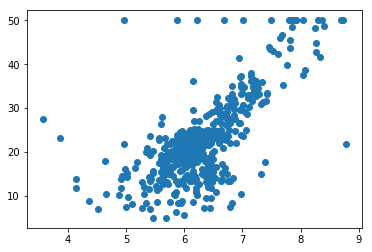

In [9]:
plt.scatter(x,y)

In [10]:
def mean_absolute_error(y, y_hat):
    return np.abs(y-y_hat).sum()/y.size

In [11]:
def get_y_hat(k,b,x):
    return k*x+b

In [30]:
def fit(x,y,trying_times=1000, lr=0.01):
    current_k, current_b=random.random() * 200 - 100, random.random() * 200 - 100
    
    for i in range(trying_times):
        y_hat=get_y_hat(current_k, current_b, x)
        
        loss=mean_absolute_error(y, y_hat)
        
        if i % 100 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, current_k, current_b, loss))
            
        y_sign=np.sign(y_hat-y)
        
        current_k=current_k+(-1)*lr*(y_sign*x).sum()/y.size
        
        current_b=current_b+(-1)*lr*y_sign.sum()/y.size
        
    return current_k, current_b


In [31]:
best_k, best_b=fit(x,y, 1500, 0.1)

When time is : 0, get best_k: -53.46991668842542 best_b: -95.31594868619398, and the loss is: 453.88763211921776
When time is : 100, get best_k: 9.376427185092489 best_b: -85.31594868619455, and the loss is: 48.92133829237292
When time is : 200, get best_k: 16.857788054657686 best_b: -83.65310283639187, and the loss is: 5.821315874043392
When time is : 300, get best_k: 16.782055643590457 best_b: -83.13926884429684, and the loss is: 5.794301229853033
When time is : 400, get best_k: 16.700627185092376 best_b: -82.63175896287395, and the loss is: 5.767881357820976
When time is : 500, get best_k: 16.62225366730578 best_b: -82.13175896287376, and the loss is: 5.7422770487621895
When time is : 600, get best_k: 16.54135208627816 best_b: -81.6365020458774, and the loss is: 5.717082594008521
When time is : 700, get best_k: 16.461770268096423 best_b: -81.14164038579814, and the loss is: 5.691962080429168
When time is : 800, get best_k: 16.382188449914686 best_b: -80.64677872571887, and the loss 

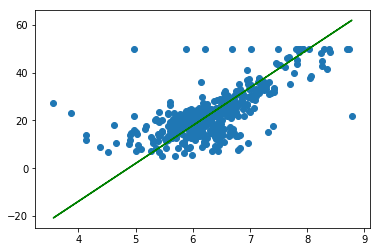

In [32]:
y_hat = get_y_hat(best_k, best_b, x)
plt.plot(x, y_hat, color='g');
plt.scatter(x, y);